# Correlation Analysis

### W.r.t ML it can help in feature engineering - when u look at how features r related to target variable, u can make new features from existing ones which have higher correlation with target for better ML model.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns


In [8]:
insurance = pd.read_csv('/Users/sylvia/Desktop/datasets/insurance.csv')
print(insurance.shape)
insurance.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Granularity of Data

1 row represents 1 customer.

### Understand relationship b/w multiple numerical columns using pairplot - qualitative analysis

- Especially to understand columns which are related to my expenses. e.g. how age, bmi impact expenses in a linear fashion? Correlation only gives u linear relationship, it will not give u non-linear relationship measure.
- Matrix like structure helps u to understand relationship b/w various numerical columns.

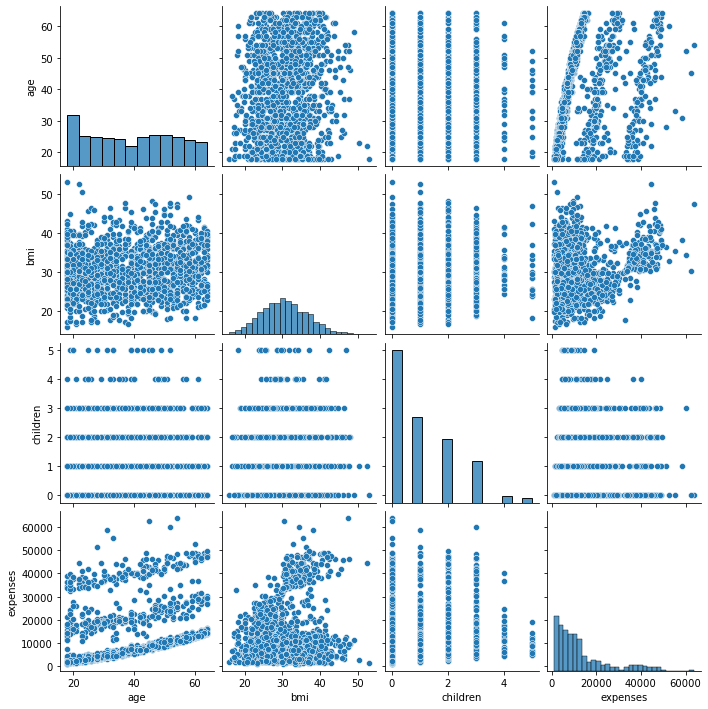

In [9]:
sns.pairplot(insurance);

**Analysis**

- bmi w.r.t age is completely scattered, so can't identify any relationship.
- Expenses w.r.t children, actually children is categorical however it has numbers that's y in numeric, can ignore. Any number of children however expense range same, so does not effect expense here.
- Expenses w.r.t age, there look like 3 different groups. In each grp as age increase, expenses increase. Overall it might look scattered but within the groups they r linearly related - as age increases expenses also increase proportionately.
- Expenses w.r.t bmi again 2 groups - one group with higher bmi and higher expenses.

### After visualization (qualitative analysis), go for quantitative analysis using correlation matrix.

In [16]:
insurance.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [10]:
insurance.corr().style.background_gradient()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [13]:
# To get easier interpretation of correlation matrix

def visualize_corr_matrix(data):
    corr_mat = data.corr()
    for col in corr_mat.columns:
        corr_mat.loc[col, col] = 0       # converting all diagnol values to 0
    return np.abs(corr_mat).style.background_gradient()   # converting all values to absolute values

In [12]:
visualize_corr_matrix(insurance)

,age,bmi,children,expenses
age,0.000000,0.109341,0.042469,0.299008
bmi,0.109341,0.000000,0.012645,0.198576
children,0.042469,0.012645,0.000000,0.067998
expenses,0.299008,0.198576,0.067998,0.000000


**Analysis**

- We see 0.29 is still a low correlation b/w expenses and age because although within groups there is pattern however overall it looks scattered.

### Introducing Categorical column in pairplot

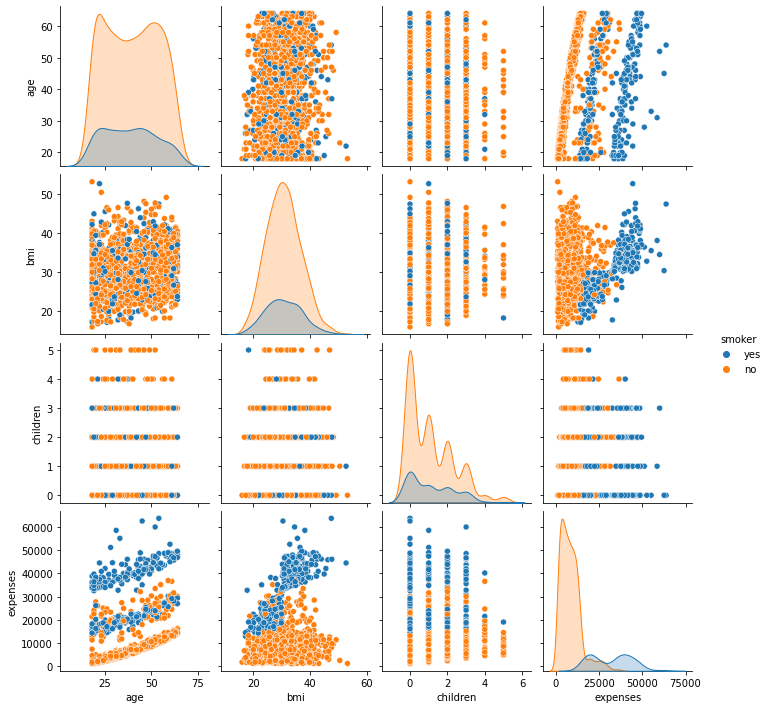

In [14]:
sns.pairplot(data=insurance, hue='smoker');

**Analysis**

- Expenses vs Age clearly shows high value for smokers expenses while low value for non-smokers. Hence we observe smokers column is an important column as it can help to differentiate b/w the classes.
- For smokers whose bmi>28, there expenses quite high.
- Hence smoker categorical variable influences r expenses target column.

### Convert binary categorical column to numerical column as it effects target variable and see it in correlation matrix.

In [15]:
insurance['is_smoker'] = insurance['smoker'].apply(
    lambda v: 1 if v == 'yes' else 0 )

In [16]:
visualize_corr_matrix(insurance)

,age,bmi,children,expenses,is_smoker
age,0.000000,0.109341,0.042469,0.299008,0.025019
bmi,0.109341,0.000000,0.012645,0.198576,0.003968
children,0.042469,0.012645,0.000000,0.067998,0.007673
expenses,0.299008,0.198576,0.067998,0.000000,0.787251
is_smoker,0.025019,0.003968,0.007673,0.787251,0.000000


**Analysis**

- As we add smoker categorical column we see it has a huge impact on target variable, linearly related with expenses. This was not observed just with numerical columns where highest correlation was 0.3.

### Target below group as seen in qualitative analysis by changing bmi & age to binary based on conditions & multiply with is_smoker.

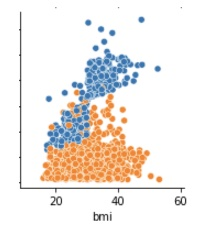

In [19]:
insurance['is_bmi_high'] = insurance['bmi'].apply(
    lambda v: 1 if v > 28 else 0 )
insurance['bmi_smoker'] = insurance['is_bmi_high'] * insurance['is_smoker']
visualize_corr_matrix(insurance)
insurance['is_age_high'] = insurance['age'].apply(lambda age: 1 if age > 50 else 0 )


In [20]:
insurance['age_smoker'] = insurance['is_age_high'] * insurance['is_smoker']
visualize_corr_matrix(insurance)

,age,bmi,children,expenses,is_smoker,is_bmi_high,bmi_smoker,age_smoker,is_age_high
age,0.000000,0.109341,0.042469,0.299008,0.025019,0.070776,0.015196,0.293425,0.768811
bmi,0.109341,0.000000,0.012645,0.198576,0.003968,0.768772,0.238958,0.039415,0.102817
children,0.042469,0.012645,0.000000,0.067998,0.007673,0.023330,0.002919,0.008936,0.104970
expenses,0.299008,0.198576,0.067998,0.000000,0.787251,0.153342,0.804108,0.473054,0.239466
is_smoker,0.025019,0.003968,0.007673,0.787251,0.000000,0.015229,0.759374,0.441673,0.037313
is_bmi_high,0.070776,0.768772,0.023330,0.153342,0.015229,0.000000,0.285425,0.019569,0.081743
bmi_smoker,0.015196,0.238958,0.002919,0.804108,0.759374,0.285425,0.000000,0.372878,0.010232
age_smoker,0.293425,0.039415,0.008936,0.473054,0.441673,0.019569,0.372878,0.000000,0.372251
is_age_high,0.768811,0.102817,0.104970,0.239466,0.037313,0.081743,0.010232,0.372251,0.000000


### Summary

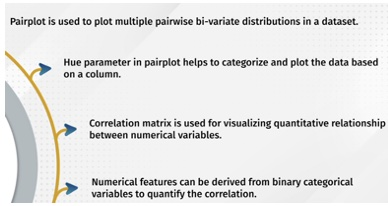